In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.integrate import odeint


In [128]:
# Constants
FWHM = 175e-15  # FWHM in fs
I_peak = 100  # Peak intensity
P_constant = 9.52e10  # Constant in P(I)
sigma = FWHM / (2 * np.sqrt(2 * np.log(2)))  # Convert FWHM to sigma for Gaussian


In [129]:
# Define the Gaussian function for I(t)
def I_t(t, I_peak, sigma):
    return I_peak * np.exp(-((t - 175e-15) ** 2) / (2 * sigma ** 2))  # Center at 350 fs

def P_I(t):
    I = I_t(t, I_peak, sigma)
    return P_constant * I**8 * 1e3

def avalanche(t):
    I = I_t(t, I_peak, sigma)
    return I

def rate_equation(t, n):
    return P_I(t) - n/60e-3 + 4*avalanche(t)*n


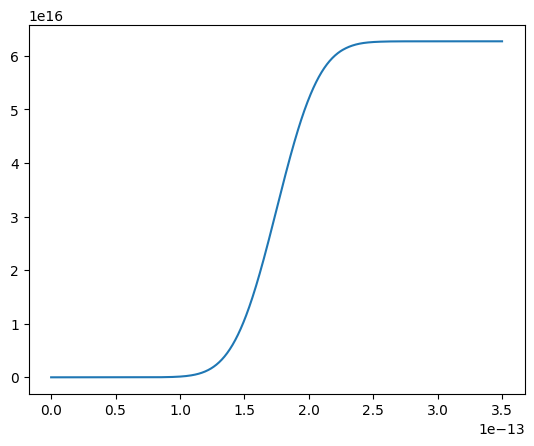

In [130]:

time_fs = np.linspace(0, 350, 1000) *1e-15
time_ps = time_fs / 1000  
n0 = [0]

sol = solve_ivp(rate_equation, [0,350], y0=n0,t_eval=time_fs, method="Radau")
y = sol.y[0]
plt.plot(time_fs, y)
plt.show()

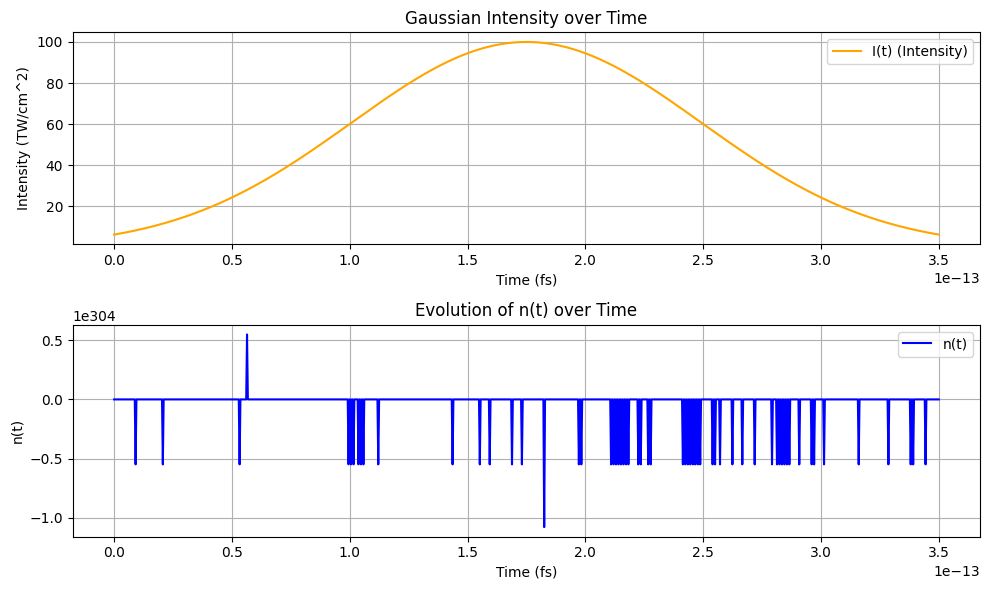

In [131]:

n_t = odeint(rate_equation, 0, time_fs)
# Plotting the results
plt.figure(figsize=(10, 6))

# Plot I(t) for reference
plt.subplot(2, 1, 1)
plt.plot(time_fs, I_t(time_fs, I_peak, sigma), label='I(t) (Intensity)', color='orange')
plt.xlabel('Time (fs)')
plt.ylabel('Intensity (TW/cm^2)')
plt.title('Gaussian Intensity over Time')
plt.grid(True)
plt.legend()

# Plot the evolution of n(t)
plt.subplot(2, 1, 2)
plt.plot(time_fs, n_t, label='n(t)', color='blue')
plt.xlabel('Time (fs)')
plt.ylabel('n(t)')
plt.title('Evolution of n(t) over Time')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()